In [ ]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# load datasetcsv
df = pd.read_csv('/content/drive/MyDrive/19CSE304-Lab/Projects/creditcard_fraud.csv')

In [ ]:
# df.drop('Unnamed: 0',axis=1,inplace=True) # unnecessary column

In [ ]:
df.shape

(1296675, 23)

In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df.tail(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,Sula,MT,59871,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [ ]:
df.sample(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
730357,730357,2019-11-08 16:01:14,4570636521433188,fraud_Fadel Inc,health_fitness,16.36,Christine,Leblanc,F,5097 Jodi Vista Suite 811,Deltona,FL,32725,28.8989,-81.2473,88735,Commercial horticulturist,1988-04-09,786feef441d363feb4dcc455108713c0,1352390474,29.490974,-81.290427,0
531897,531897,2019-08-17 07:16:24,4640395708703,"fraud_Stokes, Christiansen and Sipes",grocery_net,42.83,Melissa,Krause,F,67632 Martin Gateway,Fordoche,LA,70732,30.6576,-91.6264,1178,Community education officer,1951-06-13,0a1290f8f277cdb31a10804138c8d073,1345187784,30.306709,-91.533721,0
119364,119364,2019-03-08 16:43:39,639046421587,fraud_Barton LLC,kids_pets,51.58,Dylan,Bonilla,M,2497 John Motorway Suite 922,Leetsdale,PA,15056,40.5662,-80.2099,1140,"Administrator, education",1986-06-20,7e7cd6fbc891d2492f650edec2a2ea93,1331225019,40.331410,-79.390852,0
841301,841301,2019-12-13 22:45:18,4334230547694630,fraud_Ernser-Lynch,food_dining,54.63,Scott,Martin,M,7483 Navarro Flats,Freedom,WY,83120,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,22c55748cb46f587608e7350ece85a4d,1355438718,43.335723,-111.159900,0
45601,45601,2019-01-28 01:49:23,4841313716651064,fraud_Bradtke PLC,grocery_pos,106.87,Omar,Gay,M,2161 Blankenship Freeway,West Hartford,VT,5084,43.7185,-72.4439,140,"Development worker, community",1989-10-28,56b36e69b055f11aa70fb1b38286ebfd,1327715363,43.930310,-72.263676,0


# **Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
df[['amt','unix_time']].describe()

,amt,unix_time
count,1.296675e+06,1.296675e+06
mean,7.035104e+01,1.349244e+09
std,1.603160e+02,1.284128e+07
min,1.000000e+00,1.325376e+09
25%,9.650000e+00,1.338751e+09
50%,4.752000e+01,1.349250e+09
75%,8.314000e+01,1.359385e+09
max,2.894890e+04,1.371817e+09


In [ ]:
#null values
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
import time
import datetime
df['dob']= pd.to_datetime(df['dob'])
df['age'] = np.rint((pd.to_datetime('now') - df['dob']) / np.timedelta64(1, 'Y'))
df.drop(['dob'],inplace=True,axis=1)

In [ ]:
# fraud transactions
fraud_stats = df[df['is_fraud'] == 1].describe().transpose().reset_index()
fraud_stats = fraud_stats.rename(columns = {"index" : "Features"})
fraud_stats = np.around(fraud_stats,3)
fraud_stats

,Features,count,mean,std,min,25%,50%,75%,max
0,Unnamed: 0,7506.0,6.249497e+05,4.010560e+05,2.449000e+03,2.398565e+05,6.381620e+05,9.849215e+05,1.295733e+06
1,cc_num,7506.0,4.003577e+17,1.276871e+18,6.041621e+10,1.800429e+14,3.528041e+15,4.651007e+15,4.992346e+18
2,amt,7506.0,5.313200e+02,3.905600e+02,1.060000e+00,2.456620e+02,3.965050e+02,9.008750e+02,1.376040e+03
3,zip,7506.0,4.803871e+04,2.726556e+04,1.330000e+03,2.492700e+04,4.629000e+04,7.110700e+04,9.978300e+04
4,lat,7506.0,3.866400e+01,5.172000e+00,2.002700e+01,3.505600e+01,3.943400e+01,4.207300e+01,6.669300e+01
5,long,7506.0,-8.991600e+01,1.427800e+01,-1.656720e+02,-9.670100e+01,-8.669200e+01,-7.994200e+01,-6.855600e+01
6,city_pop,7506.0,9.727676e+04,3.265815e+05,2.300000e+01,7.465000e+02,2.623000e+03,2.143700e+04,2.906700e+06
7,unix_time,7506.0,1.348389e+09,1.383020e+07,1.325466e+09,1.335744e+09,1.348872e+09,1.360021e+09,1.371787e+09
8,merch_lat,7506.0,3.865400e+01,5.218000e+00,1.942500e+01,3.511500e+01,3.942700e+01,4.198700e+01,6.751000e+01
9,merch_long,7506.0,-8.991600e+01,1.429900e+01,-1.665510e+02,-9.667100e+01,-8.681300e+01,-7.990700e+01,-6.756900e+01


In [ ]:
# proper transactions

proper_stats = (df[df['is_fraud'] == 0].describe().transpose().reset_index())
proper_stats = proper_stats.rename(columns = {"index" : "Features"})
proper_stats = np.around(proper_stats,3)
proper_stats

,Features,count,mean,std,min,25%,50%,75%,max
0,Unnamed: 0,1289169.0,6.484732e+05,3.741526e+05,0.000000e+00,3.246100e+05,6.484110e+05,9.723990e+05,1.296674e+06
1,cc_num,1289169.0,4.172901e+17,1.308990e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
2,amt,1289169.0,6.766700e+01,1.540080e+02,1.000000e+00,9.610000e+00,4.728000e+01,8.254000e+01,2.894890e+04
3,zip,1289169.0,4.880511e+04,2.689099e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
4,lat,1289169.0,3.853700e+01,5.075000e+00,2.002700e+01,3.462000e+01,3.935400e+01,4.194000e+01,6.569000e+01
5,long,1289169.0,-9.022800e+01,1.375600e+01,-1.656720e+02,-9.679800e+01,-8.747700e+01,-8.015800e+01,-6.795000e+01
6,city_pop,1289169.0,8.877523e+04,3.018065e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
7,unix_time,1289169.0,1.349249e+09,1.283514e+07,1.325376e+09,1.338759e+09,1.349254e+09,1.359378e+09,1.371817e+09
8,merch_lat,1289169.0,3.853700e+01,5.109000e+00,1.902800e+01,3.473100e+01,3.936500e+01,4.195700e+01,6.668300e+01
9,merch_long,1289169.0,-9.022800e+01,1.376800e+01,-1.666710e+02,-9.689900e+01,-8.744100e+01,-8.023900e+01,-6.695100e+01


In [ ]:
# Count of is_fraud = 1 => fraudelent transactions 
# Count of is_fraud = 0 => proper transactions
df["is_fraud"].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [ ]:
# fraud vs proper transactions 
total = df["is_fraud"].value_counts()
proper = total[0]
fraud = total[1]
perc_of_proper = (proper/(proper+fraud))*100
perc_of_fraud = (fraud/(proper+fraud))*100
print('Non-fraudulent transactions : {}'.format(proper))
print('Percentage of Non-fraudulent transactions : {:.3f}%'.format(perc_of_proper))
print('Fraudulent transactions : {}'.format(fraud))
print('Percentage of Fraudulent transactions : {:.3f}%'.format(perc_of_fraud))

Non-fraudulent transactions : 1289169
Percentage of Non-fraudulent transactions : 99.421%
Fraudulent transactions : 7506
Percentage of Fraudulent transactions : 0.579%


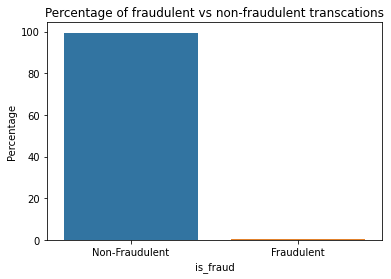

In [ ]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'is_fraud':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[perc_of_proper, perc_of_fraud]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='is_fraud',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

# **Data Selection and Manipulation**

In [ ]:
df.set_index('Unnamed: 0',inplace=True)

In [ ]:
# Resetting index
df.reset_index()
df.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,34.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,43.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,60.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,55.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,36.0


In [ ]:
df.rename_axis(None,inplace=True)

In [ ]:
df['is_fraud'].unique()

array([0, 1])

In [ ]:
df.at[24,'is_fraud']

0

In [ ]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,34.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,43.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,60.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,55.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,36.0


In [ ]:
df.loc[(df['gender']=='F') & (df['state']=='NC')& (df['is_fraud']==1),'is_fraud'].count()

55

In [ ]:
df.loc[(df['gender']=='M') & (df['category']=='fraud_Keeling-Crist') & (df['amt']>10000) ,'is_fraud'].count()

0

In [ ]:
df.iloc[:20,[5,6,-2]]

,first,last,is_fraud
0,Jennifer,Banks,0
1,Stephanie,Gill,0
2,Edward,Sanchez,0
3,Jeremy,White,0
4,Tyler,Garcia,0
5,Jennifer,Conner,0
6,Kelsey,Richards,0
7,Steven,Williams,0
8,Heather,Chase,0
9,Melissa,Aguilar,0


In [ ]:
df.sort_values(by=['amt'])

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
856060,2019-12-16 13:12:51,30518206766474,fraud_Wilkinson PLC,kids_pets,1.00,Tamara,Martinez,F,471 Marquez Prairie Suite 680,Matthews,MO,63867,36.7154,-89.6287,1019,Aeronautical engineer,2260cb1f6392bacaa21ed3cdf256b9d0,1355663571,35.885287,-90.400848,0,43.0
371549,2019-06-21 09:23:24,4783226709001,fraud_Cormier LLC,shopping_net,1.00,Jessica,Garcia,F,13108 Jennifer Passage,Mc Cracken,KS,67556,38.5957,-99.5540,320,Film/video editor,14c3b79eba42307636f7043a0f223614,1340270604,39.540400,-98.554979,0,61.0
300745,2019-05-26 19:47:03,2286236465059468,fraud_Friesen Ltd,health_fitness,1.00,Morgan,Murray,F,2788 Brittney Island,Blairstown,MO,64726,38.5319,-93.9221,467,Agricultural consultant,d305b2b6db28f8a491bb1f10818e119a,1338061623,38.724478,-93.413349,0,72.0
906626,2019-12-28 13:29:54,3523843138706408,fraud_Nader-Maggio,personal_care,1.00,Grace,Williams,F,28812 Charles Mill Apt. 628,Plantersville,AL,36758,32.6176,-86.9475,1412,Drilling engineer,2d99df3e24dcaec9efababe18c9c160d,1356701394,33.522638,-86.248212,0,51.0
483715,2019-07-30 16:14:35,2285066385084291,fraud_Larson-Moen,entertainment,1.00,Richard,Brown,M,17819 Jose Mount Suite 657,Heidelberg,MS,39439,31.8820,-88.9981,4573,"Exhibitions officer, museum/gallery",d78fe6ed57e7b370133a193a0c655335,1343664875,32.859879,-89.101711,0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352894,2019-06-14 20:15:38,5540636818935089,fraud_Hackett Group,travel,25086.94,Kenneth,Foster,M,329 Michael Extension,Lawrence,MA,1843,42.6911,-71.1605,76383,Geoscientist,0b902a1e549c98b949444a7557da2403,1339704938,42.397174,-71.474163,0,37.0
606211,2019-09-14 22:19:01,30408301059761,fraud_Boyer-Haley,travel,26544.12,Brandon,Pittman,M,2881 Frey Village,Cross,SC,29436,33.3364,-80.1859,4471,Occupational hygienist,dda9d800d37a9fc2c086a836d66b0588,1347661141,33.020256,-80.125607,0,48.0
1234797,2020-05-30 17:31:30,60423098130,"fraud_Monahan, Hermann and Johns",travel,27119.77,Jason,Gray,M,875 Amy Point,Amorita,OK,73719,36.9412,-98.2458,83,Barrister's clerk,916093eeab1831be71d49362bf5b7be5,1369935090,37.286865,-97.249611,0,63.0
793677,2019-12-02 15:53:46,675909898057,"fraud_Monahan, Hermann and Johns",travel,27390.12,Christopher,Henry,M,1198 Robert Stravenue Apt. 479,Armonk,NY,10504,41.1360,-73.7009,7987,Television/film/video producer,2ca9bd5df126cc35e541a4f2c2551197,1354463626,41.665873,-74.663015,0,58.0


In [ ]:
df.groupby('is_fraud').count()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,age
is_fraud,,,,,,,,,,,,,,,,,,,,,
0,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169
1,7506,7506,7506,7506,7506,7506,7506,7506,7506,7506,7506,7506,7506,7506,7506,7506,7506,7506,7506,7506,7506


In [ ]:
df.groupby(['is_fraud']).mean()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,age
is_fraud,,,,,,,,,,
0,4.172901e+17,67.667110,48805.107481,38.536888,-90.228142,88775.228137,1.349249e+09,38.536659,-90.228274,48.159423
1,4.003577e+17,531.320092,48038.714229,38.663609,-89.916041,97276.763256,1.348389e+09,38.653901,-89.915808,51.004263


In [ ]:
df.nlargest(4,'amt')

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
787549,2019-12-01 16:19:23,4979422371139333,fraud_Satterfield-Lowe,travel,28948.90,Kelly,Zimmerman,F,1893 Katie Tunnel,Westerville,NE,68881,41.4193,-99.3844,73,Product designer,309c4bf7fc47b1ddee5ad883bcf634b6,1354378763,42.317313,-99.139498,0,87.0
793677,2019-12-02 15:53:46,675909898057,"fraud_Monahan, Hermann and Johns",travel,27390.12,Christopher,Henry,M,1198 Robert Stravenue Apt. 479,Armonk,NY,10504,41.1360,-73.7009,7987,Television/film/video producer,2ca9bd5df126cc35e541a4f2c2551197,1354463626,41.665873,-74.663015,0,58.0
1234797,2020-05-30 17:31:30,60423098130,"fraud_Monahan, Hermann and Johns",travel,27119.77,Jason,Gray,M,875 Amy Point,Amorita,OK,73719,36.9412,-98.2458,83,Barrister's clerk,916093eeab1831be71d49362bf5b7be5,1369935090,37.286865,-97.249611,0,63.0
606211,2019-09-14 22:19:01,30408301059761,fraud_Boyer-Haley,travel,26544.12,Brandon,Pittman,M,2881 Frey Village,Cross,SC,29436,33.3364,-80.1859,4471,Occupational hygienist,dda9d800d37a9fc2c086a836d66b0588,1347661141,33.020256,-80.125607,0,48.0


In [ ]:
df_copy=df.iloc[:,[4,-2]]

In [ ]:
melted=pd.melt(df_copy,id_vars=['is_fraud'],var_name='Attribute')
melted

,is_fraud,Attribute,value
0,0,amt,4.97
1,0,amt,107.23
2,0,amt,220.11
3,0,amt,45.00
4,0,amt,41.96
...,...,...,...
1296670,0,amt,15.56
1296671,0,amt,51.70
1296672,0,amt,105.93
1296673,0,amt,74.90


In [ ]:
melted[melted['is_fraud']==1]

,is_fraud,Attribute,value
2449,1,amt,281.06
2472,1,amt,11.52
2523,1,amt,276.31
2546,1,amt,7.03
2553,1,amt,275.73
...,...,...,...
1295399,1,amt,977.01
1295491,1,amt,1210.91
1295532,1,amt,10.24
1295666,1,amt,21.69


In [ ]:
unmelt=melted.pivot_table(index=['is_fraud'],columns='Attribute',values='value',aggfunc='mean')
unmelt

Attribute,amt
is_fraud,
0,67.667110
1,531.320092


In [ ]:
pd.crosstab(df.amt,df.is_fraud)

is_fraud,0,1
amt,,
1.00,222,0
1.01,523,0
1.02,533,0
1.03,499,0
1.04,538,0
...,...,...
25086.94,1,0
26544.12,1,0
27119.77,1,0


In [ ]:
df_proper = df.loc[df['is_fraud']==0,['amt']]
df_fraud = df.loc[df['is_fraud']==1,['amt']]

###**Label Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# label_encoder 
label_encoder = LabelEncoder()
 
# Encode labels in column 'gender'.
df['gender']= label_encoder.fit_transform(df['gender'])

In [ ]:
# Seperating nominal from numeric
df1 = df.loc[:,df.dtypes!=np.object]
df1

,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age
0,2703186189652095,4.97,0,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,34.0
1,630423337322,107.23,0,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,43.0
2,38859492057661,220.11,1,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,60.0
3,3534093764340240,45.00,1,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,55.0
4,375534208663984,41.96,1,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,15.56,1,84735,37.7175,-112.4777,258,1371816728,36.841266,-111.690765,0,60.0
1296671,6011149206456997,51.70,1,21790,39.2667,-77.5101,100,1371816739,38.906881,-78.246528,0,42.0
1296672,3514865930894695,105.93,1,88325,32.9396,-105.8189,899,1371816752,33.619513,-105.130529,0,54.0
1296673,2720012583106919,74.90,1,57756,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160,0,41.0


# **Hypothesis Testing**

##**z-test**

In [ ]:
pop_mean = df['amt'].mean()
pop_mean

70.35103545606833

In [ ]:
pop_std = df['amt'].std()

In [ ]:
data = df['amt'].sample(42)

In [ ]:
sample_mean=np.mean(data)
sample_mean

86.91428571428568

In [ ]:
import scipy.stats as st
st.norm.interval(alpha=0.1,loc=np.mean(data),scale=st.sem(data))

(84.628133189724, 89.20043823884738)

In [ ]:
#two tailed 
Z_critical = st.norm.ppf(0.1/2)
Z_critical

-1.6448536269514729

In [ ]:
# H0 : mu = 70.35   :  mu!= 70.35
n = 42 
xbar = sample_mean #sample mean
mu = pop_mean       #population mean
sigma =  pop_std    #population standard deviation
alpha = 0.1

In [ ]:
z_value = (xbar-mu)/(sigma/np.sqrt(n))
z_value

0.6695657590020503

In [ ]:
p_value = 2*(1- st.norm.cdf(z_value))
p_value

0.5031346479208547

In [ ]:
if(p_value>alpha):
   print('Accept Null Hypothesis')
else:
   print('Reject Null Hypothesis')

Accept Null Hypothesis


In [ ]:
import scipy.stats as st
st.norm.interval(alpha=0.95,loc=np.mean(data),scale=st.sem(data))

(51.25672892815683, 122.57184250041453)

In [ ]:
import scipy.stats as st
st.norm.interval(alpha=0.99,loc=np.mean(data),scale=st.sem(data))

(40.05231254174108, 133.77625888683028)

##**t-test**

In [ ]:
#H0 : mu=75.35  Ha :  mu=75.35
n = 42 
degrees_of_freedom = n-1
xbar =  sample_mean       #sample mean
mu = pop_mean             #population mean
sigma =  pop_std               
alpha = 0.1

In [ ]:
t_value=(xbar-mu)/(sigma/np.sqrt(n))
t_value

0.6695657590020503

In [ ]:
t_critical=abs(st.t.ppf(alpha/2,degrees_of_freedom))
t_critical

1.682878000411292

In [ ]:
if(t_value<t_critical): #2 tail
  print('Accept Null hypothesis')
else:
  print('Reject Null Hypothesis')

Accept Null hypothesis


# **Visualisation**

In [ ]:
# OUTLIERS

# Finding the 1st and 3rd Quantile for Amount Column
Q1 = np.percentile(df['amt'], 25)
Q3 = np.percentile(df['amt'], 75)

# interquartile range
IQR = (Q3 - Q1)

# computing lower bound and upper bound
lower_bound = Q1 - (IQR * 1.5)
upper_bound = Q3 + (IQR * 1.5)

#  Remove values less than lower bound and greater than upper bound
outliers_data = (df['amt'] < lower_bound) | (df['amt'] > upper_bound)

# Finding outliers from dataset
outliers = df[outliers_data]['amt']
fraud_outliers = df[(df['is_fraud'] == 1) & outliers_data]['amt']
proper_outliers = df[(df['is_fraud'] == 0) & outliers_data]['amt']
print(f"Total Number of Outliers : {outliers.count()}")
print(f"Number of Outliers in Fraudulent Class : {fraud_outliers.count()}")
print(f"Number of Outliers in Normal Class : {proper_outliers.count()}")

Total Number of Outliers : 67290
Number of Outliers in Fraudulent Class : 5705
Number of Outliers in Normal Class : 61585


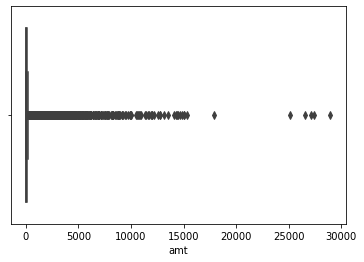

In [ ]:
sns.boxplot(x = "amt", data = df)
plt.show()

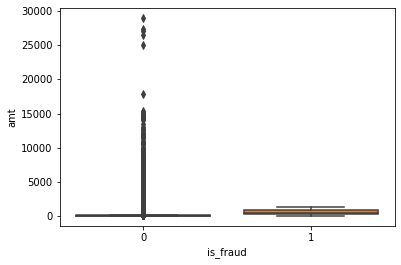

In [ ]:
sns.boxplot(x = "is_fraud", y = "amt", data = df)
plt.show()

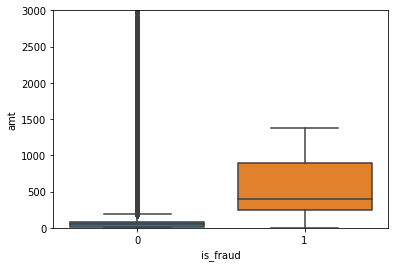

In [ ]:
sns.boxplot(x = "is_fraud", y = "amt", data = df)
plt.ylim(0, 3000)
plt.show()

Text(0.5, 1.0, 'Title')

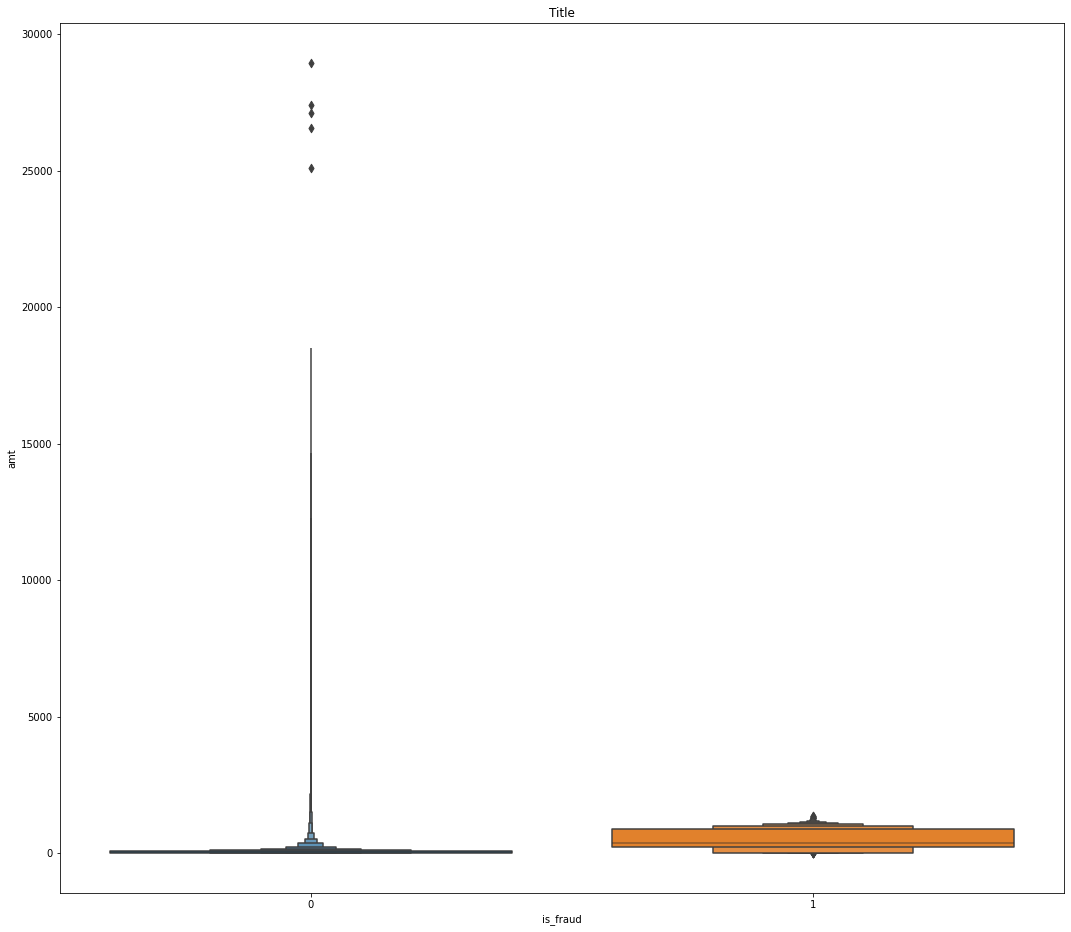

In [ ]:
plt.figure(figsize=(18,16))
sns.boxenplot(x=df.is_fraud, y=df.amt).set_title("Title")

In [ ]:
#data = df[['amt','age', 'is_fraud']]
#sns.set_style("whitegrid")
#sns.pairplot(data, hue='is_fraud',size=5)
#plt.show()

In [ ]:
# Creating fraudulent dataframe
data_fraud = df[df['is_fraud'] == 1]

# Creating non fraudulent dataframe
data_proper = df[df['is_fraud'] == 0]

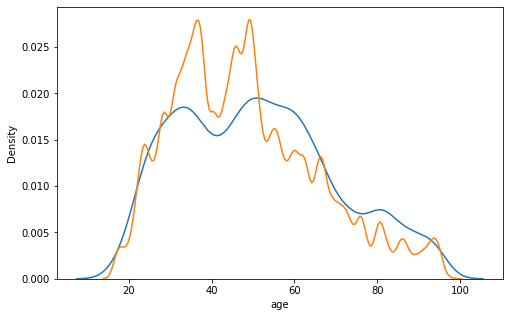

In [ ]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['age'],label='fraudulent',hist=False)
ax = sns.distplot(data_proper['age'],label='non-fraudulent',hist=False)
ax.set(xlabel='age')
plt.show()

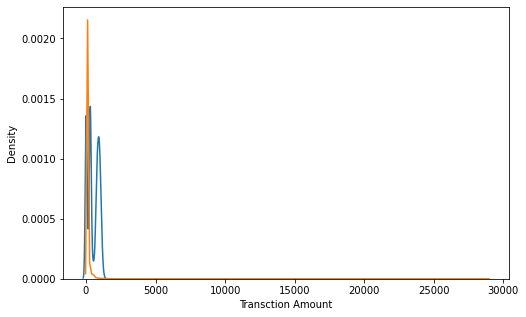

In [ ]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['amt'],label='fraudulent',hist=False)
ax = sns.distplot(data_proper['amt'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

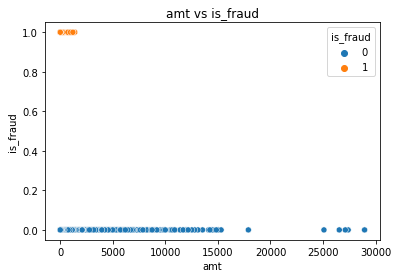

In [ ]:
# Scatter plot
sns.scatterplot(df["amt"], df["is_fraud"],hue=df['is_fraud'])
plt.title("amt vs is_fraud")
plt.show()

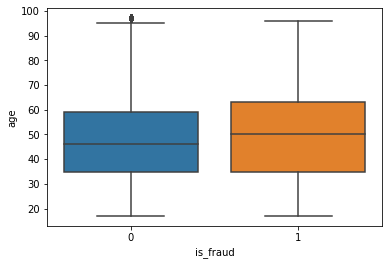

In [ ]:
#Boxplot
sns.boxplot(x = "is_fraud", y = "age", data = df)
plt.show()

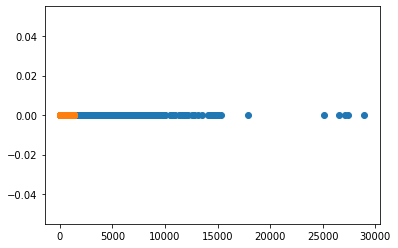

In [ ]:
plt.plot(df_proper["amt"], np.zeros_like(df_proper["amt"]), "o")
plt.plot(df_fraud["amt"], np.zeros_like(df_fraud["amt"]), "o")
plt.show()

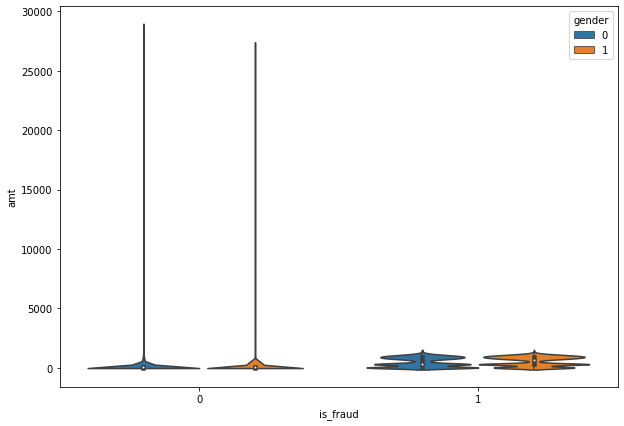

In [ ]:
plt.figure(figsize=(10,7))
sns.violinplot(x=df['is_fraud'],y=df['amt'], data = df,hue='gender')
plt.show()

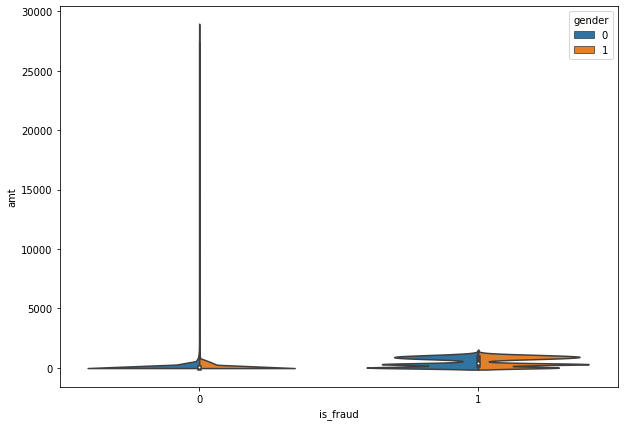

In [ ]:
plt.figure(figsize=(10,7))
sns.violinplot(x=df['is_fraud'],y=df['amt'], data = df, hue='gender',split=True)
plt.show()

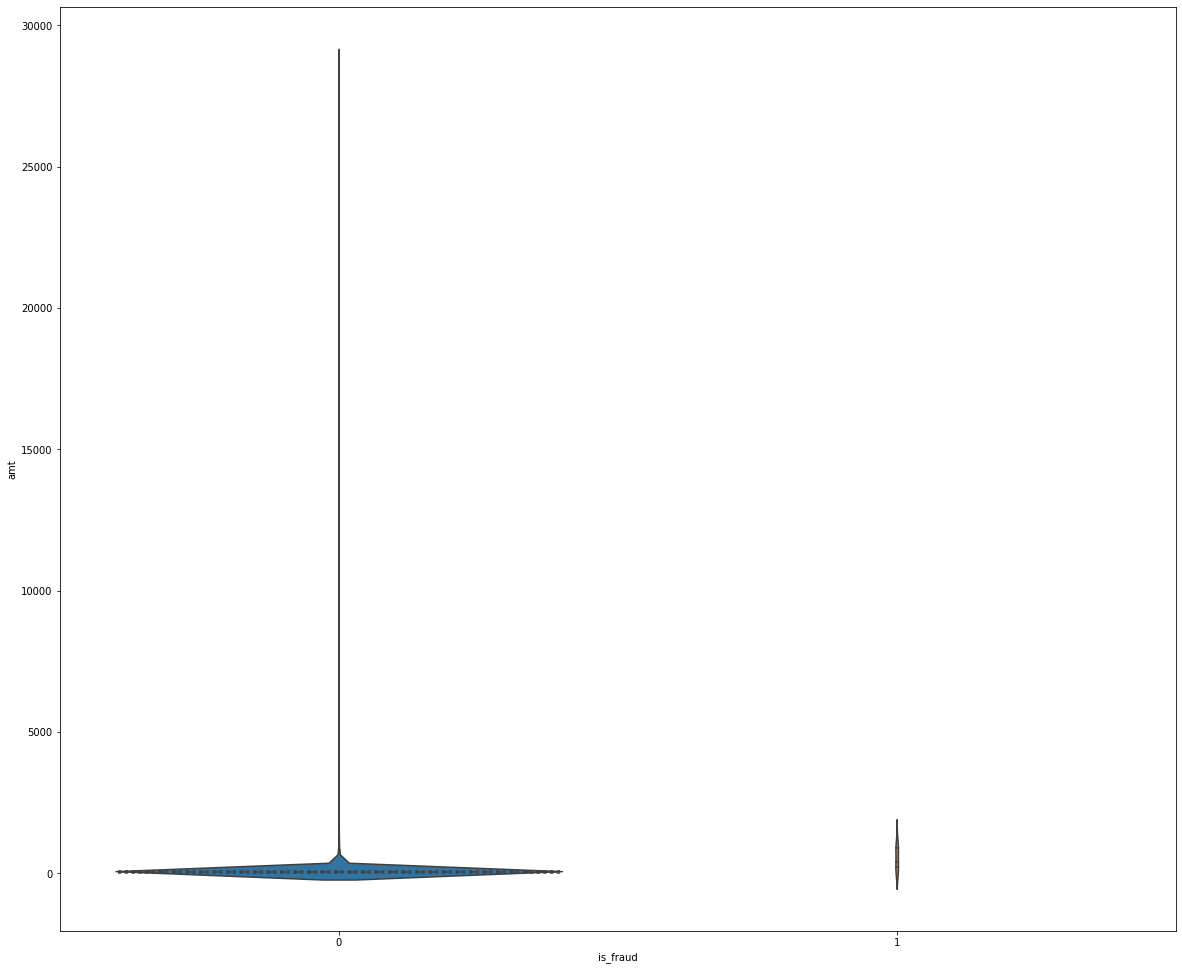

In [ ]:
plt.figure(figsize=(20,17))
sns.violinplot(x=df['is_fraud'],y=df['amt'], data = df,inner='quartile',scale='count',bw=.7)
plt.show()

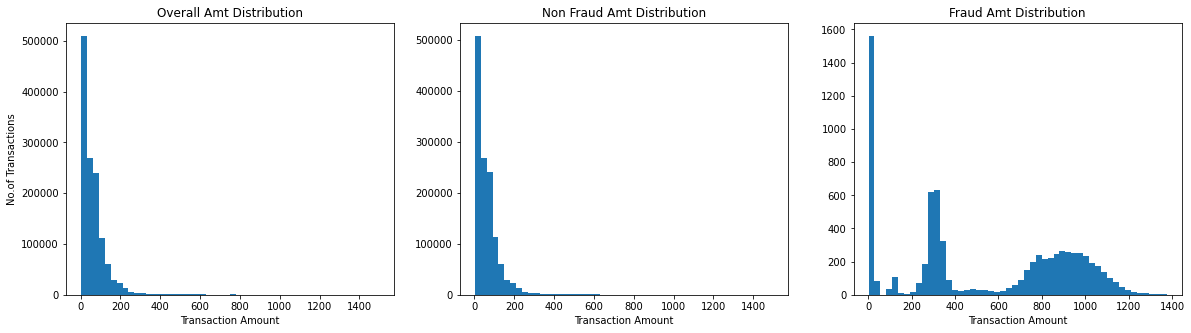

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(df[df['amt']<=1500]['amt'], bins=50)
ax[1].hist(df[(df['is_fraud']==0) & (df['amt']<=1500)]['amt'], bins=50)
ax[2].hist(df[(df['is_fraud']==1) & (df['amt']<=1500)]['amt'], bins=50)

ax[0].set_title('Overall Amt Distribution')
ax[1].set_title('Non Fraud Amt Distribution')
ax[2].set_title('Fraud Amt Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('No.of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

# **Feature Scaling**

In [ ]:
df2=df1.drop(['cc_num','is_fraud'],axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
standard_df = scaler.fit_transform(df2)
standard_df = pd.DataFrame(standard_df)
  
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(df2)
minmax_df = pd.DataFrame(minmax_df)

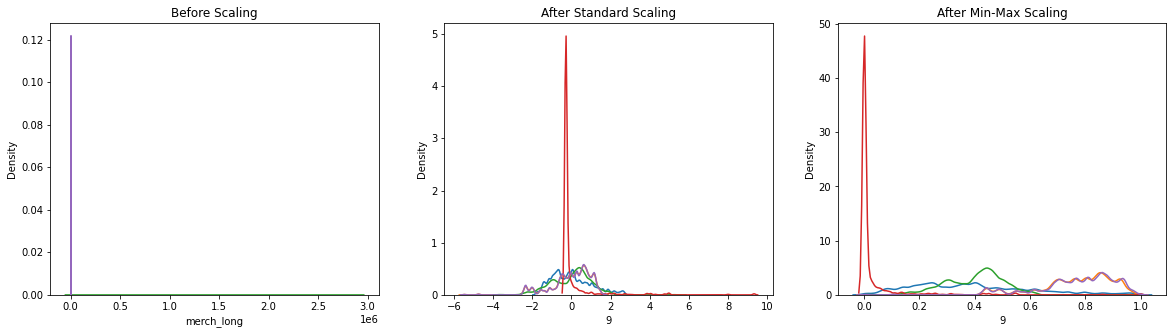

In [ ]:
# using KDE plot
#Only some columns are opted out in order to speed up the process
fig, (ax1,ax3,ax4) = plt.subplots(ncols = 3, figsize =(20, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df2['merch_long'], ax = ax1)
sns.kdeplot(df2['merch_lat'], ax = ax1)
sns.kdeplot(df2['city_pop'], ax = ax1)
sns.kdeplot(df2['long'], ax = ax1)
sns.kdeplot(df2['lat'], ax = ax1)

ax3.set_title('After Standard Scaling')  
sns.kdeplot(standard_df[9], ax = ax3)
sns.kdeplot(standard_df[8], ax = ax3)
sns.kdeplot(standard_df[7], ax = ax3)
sns.kdeplot(standard_df[5], ax = ax3)
sns.kdeplot(standard_df[4], ax = ax3)


ax4.set_title('After Min-Max Scaling')  
sns.kdeplot(minmax_df[9], ax = ax4)
sns.kdeplot(minmax_df[8], ax = ax4)
sns.kdeplot(minmax_df[7], ax = ax4)
sns.kdeplot(minmax_df[5], ax = ax4)
sns.kdeplot(minmax_df[4], ax = ax4)

In [ ]:
standard_df.columns = ['amt','gender','zip','lat','long','city_pop','unix_time','merch_lat','merch_long','age']

In [ ]:
standard_df['is_fraud']=df1['is_fraud']

In [ ]:
standard_df

,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,age,is_fraud
0,-0.407826,-0.909206,-0.749136,-0.484420,0.657620,-0.282589,-1.858664,-0.494354,0.593864,-0.814926,0
1,0.230039,-0.909206,1.872567,2.039120,-2.033870,-0.293670,-1.858662,2.078699,-2.030341,-0.297545,0
2,0.934149,1.099861,1.281042,0.717754,-1.601537,-0.280406,-1.858662,0.902849,-1.592323,0.679730,0
3,-0.158132,1.099861,0.402753,1.515617,-1.590766,-0.287742,-1.858660,1.662886,-1.621848,0.392296,0
4,-0.177094,1.099861,-0.906090,-0.023035,0.782279,-0.293835,-1.858651,0.026941,0.841909,-0.699953,0
...,...,...,...,...,...,...,...,...,...,...,...
1296670,-0.341769,1.099861,1.336186,-0.161575,-1.617214,-0.293309,1.757855,-0.331926,-1.558650,0.679730,0
1296671,-0.116339,1.099861,-1.004368,0.143638,0.924207,-0.293832,1.757855,0.072321,0.869934,-0.355032,0
1296672,0.221930,1.099861,1.469677,-1.102883,-1.133257,-0.291186,1.757856,-0.962433,-1.082272,0.334809,0
1296673,0.028375,1.099861,0.332996,0.948613,-0.895029,-0.290434,1.757861,0.832051,-0.945074,-0.412519,0


###**Resampling using SMOTE(Synthetic Minority Over-sampling Technique)**

In [ ]:
X = standard_df.drop('is_fraud',axis=1)
y = standard_df['is_fraud']

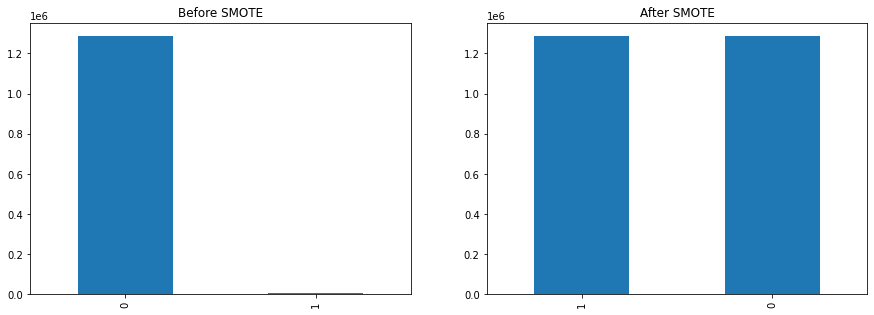

In [ ]:
# Resampling via SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_smote, y_smote = sm.fit_resample(X, y.ravel())

# to demonstrate the effect of SMOTE over imbalanced datasets
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before SMOTE')
pd.Series(y).value_counts().plot.bar(ax=ax1)

ax2.set_title('After SMOTE')  
pd.Series(y_smote).value_counts().plot.bar(ax=ax2)

plt.show()

In [ ]:
X=pd.DataFrame(X_smote)
X.columns =['amt','gender','zip','lat','long','city_pop','unix_time','merch_lat','merch_long','age']

In [ ]:
y = pd.Series(y_smote)
y

0          0
1          0
2          0
3          0
4          0
          ..
2578333    1
2578334    1
2578335    1
2578336    1
2578337    1
Length: 2578338, dtype: int64

In [ ]:
np.unique(y)

array([0, 1])

In [ ]:
values, counts = np.unique(y, return_counts=True)
counts

array([1289169, 1289169])

## **EDA**

# **Descriptive Statistics**

In [ ]:
# MEAN
print("Means of the fraud and proper transactions:")
print("Mean of transaction amount of proper transactions: ",np.mean(df_proper["amt"]))
print("Mean of transaction amount of fraud transactions: ",np.mean(df_fraud["amt"]))

Means of the fraud and proper transactions:
Mean of transaction amount of proper transactions:  67.667109812599
Mean of transaction amount of fraud transactions:  531.3200919264573


In [ ]:
# MEDIAN
print("Median of the fraud and proper transactions:")
print("Median of transaction amount of proper transactions: ", np.median(df_proper["amt"]))
print("Median of transaction amount of fraud transactions: ", np.median(df_fraud["amt"]))

Median of the fraud and proper transactions:
Median of transaction amount of proper transactions:  47.28
Median of transaction amount of fraud transactions:  396.505


In [ ]:
# STANDARD DEVIATION
print("Standard Deviation of the fraud and proper transactions:")
print("Std-Deviation of transaction amount of proper transactions: ", np.std(df_proper["amt"]))
print("Std-Deviation of transaction amount of fraud transactions: ", np.std(df_fraud["amt"]))

Standard Deviation of the fraud and proper transactions:
Std-Deviation of transaction amount of proper transactions:  154.00791081458004
Std-Deviation of transaction amount of fraud transactions:  390.5340523341919


In [ ]:
# VARIANCE
print("Variance of the fraud and proper transactions:")
print("Variance of transaction amount of proper transactions: ", np.var(df_proper["amt"]))
print("Variance of transaction amount of fraud transactions: ", np.var(df_fraud["amt"]))

Variance of the fraud and proper transactions:
Variance of transaction amount of proper transactions:  23718.436593471637
Variance of transaction amount of fraud transactions:  152516.84603256537


In [ ]:
# KURTOSIS 
#Proper
df.loc[df['is_fraud']==0,'amt'].kurt()

5369.470710133239

In [ ]:
#Fraud
df.loc[df['is_fraud']==1,'amt'].kurt()

-1.4998715572316823

In [ ]:
# SKEWNESS
# Fraud
df.loc[df['is_fraud']==1,'amt'].skew()

0.02584608402403506

In [ ]:
#Proper
df.loc[df['is_fraud']==0,'amt'].skew()

47.523765335989694

In [ ]:
var = standard_df.columns

In [ ]:
var

Index(['amt', 'gender', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'age', 'is_fraud'],
      dtype='object')

Text(0.5, 1.0, 'Means')

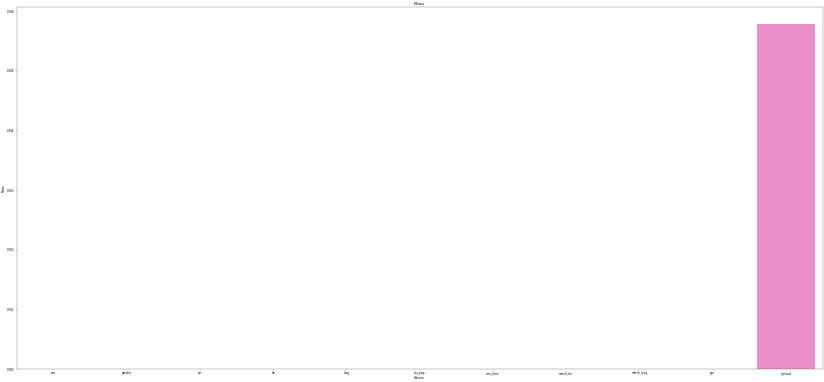

In [ ]:
plt.figure(figsize=(52,24), dpi=20)
x=sns.barplot(x=var, y=standard_df[var].mean())
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('Means')

Text(0.5, 1.0, 'Standard Deviations')

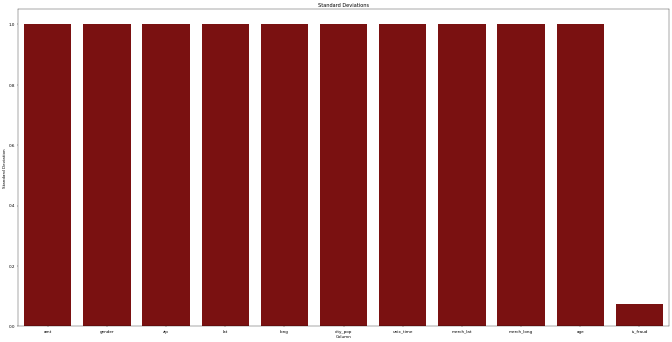

In [ ]:
plt.figure(figsize=(28,14), dpi=30)
sns.barplot(x=var, y=standard_df[var].std(), color='darkred')
plt.xlabel('Column')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviations')

Text(0.5, 1.0, 'Medians')

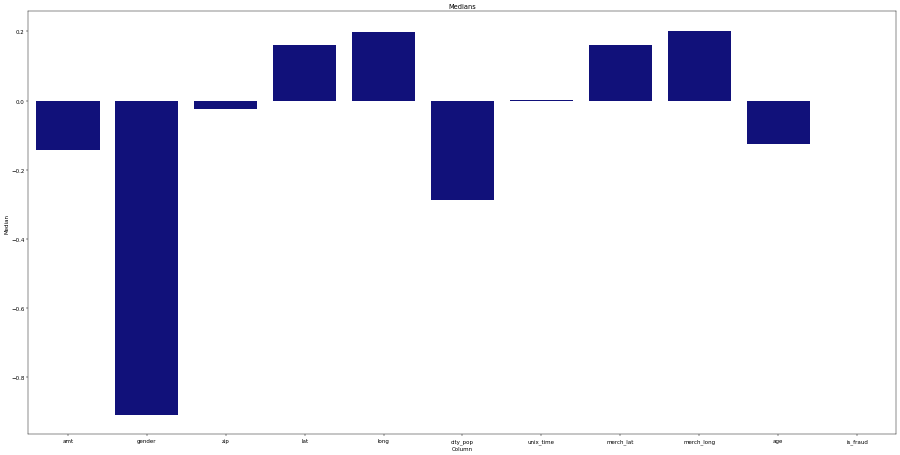

In [ ]:
plt.figure(figsize=(28,14), dpi=40)
sns.barplot(x=var, y=standard_df[var].median(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Median')
plt.title('Medians')

Text(0.5, 1.0, 'IQRs')

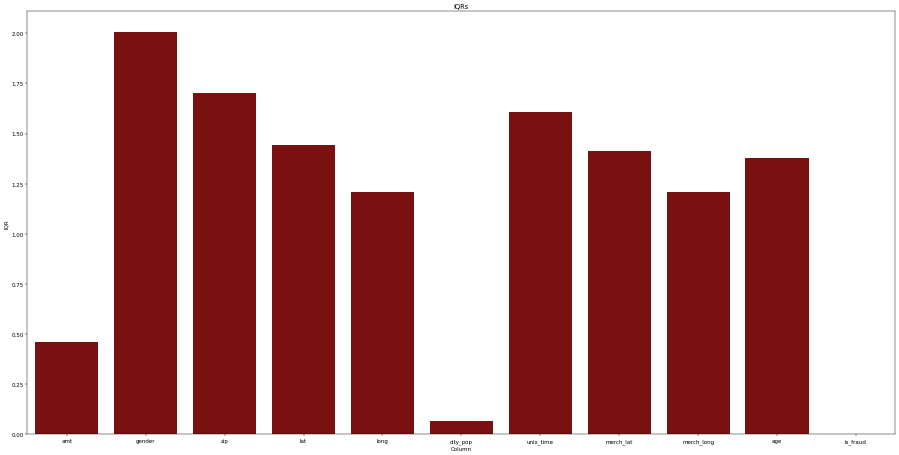

In [ ]:
plt.figure(figsize=(28,14), dpi=40)
sns.barplot(x=var, y=standard_df[var].quantile(0.75) - standard_df[var].quantile(0.25), color='darkred')
plt.xlabel('Column')
plt.ylabel('IQR')
plt.title('IQRs')

Text(0.5, 1.0, 'Skewnesses')

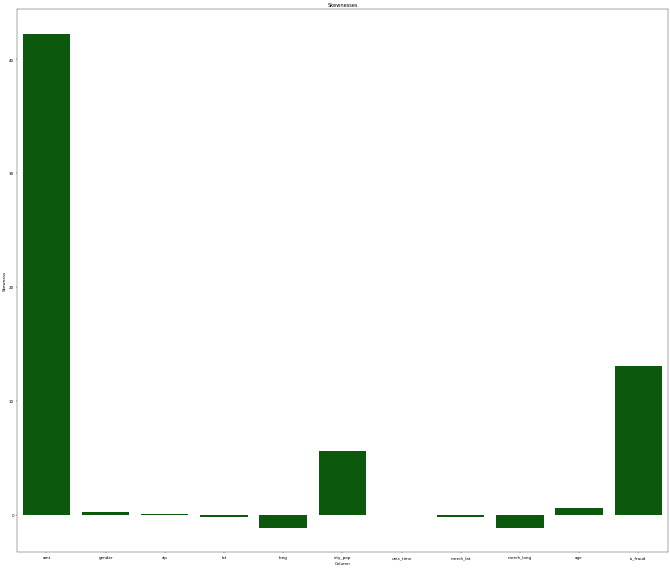

In [ ]:
plt.figure(figsize=(28,24), dpi=30)
sns.barplot(x=var, y=standard_df[var].skew(), color='darkgreen')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('Skewnesses')

Text(0.5, 1.0, 'Kurtoses')

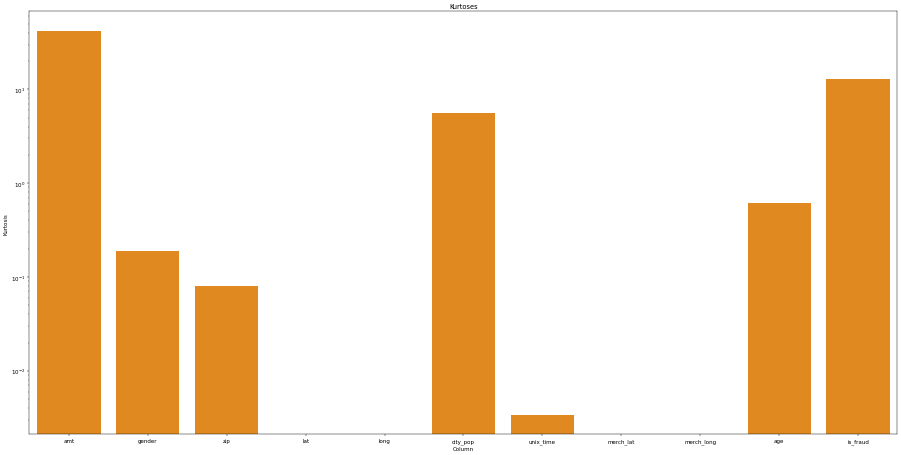

In [ ]:
plt.figure(figsize=(28,14), dpi=40)
plt.yscale('log')
sns.barplot(x=var, y=standard_df[var].skew(), color='darkorange')
plt.xlabel('Column')
plt.ylabel('Kurtosis')
plt.title('Kurtoses')

# **Feature Selection using Correlation**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
X_train.corr()

,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,age
amt,1.000000,0.079948,-0.019337,0.008772,0.018011,0.022305,-0.007394,0.008125,0.018153,0.068934
gender,0.079948,1.000000,-0.047953,0.056498,0.036165,-0.027848,0.009299,0.056000,0.036212,-0.000199
zip,-0.019337,-0.047953,1.000000,-0.084382,-0.911082,0.102156,0.007828,-0.083658,-0.910351,0.004206
lat,0.008772,0.056498,-0.084382,1.000000,-0.065671,-0.169220,-0.019385,0.994669,-0.065665,0.023372
long,0.018011,0.036165,-0.911082,-0.065671,1.000000,-0.070083,-0.003775,-0.065728,0.999290,-0.020041
city_pop,0.022305,-0.027848,0.102156,-0.169220,-0.070083,1.000000,0.002769,-0.169431,-0.070139,-0.064432
unix_time,-0.007394,0.009299,0.007828,-0.019385,-0.003775,0.002769,1.000000,-0.019791,-0.003748,0.011960
merch_lat,0.008125,0.056000,-0.083658,0.994669,-0.065728,-0.169431,-0.019791,1.000000,-0.065693,0.022842
merch_long,0.018153,0.036212,-0.910351,-0.065665,0.999290,-0.070139,-0.003748,-0.065693,1.000000,-0.019765
age,0.068934,-0.000199,0.004206,0.023372,-0.020041,-0.064432,0.011960,0.022842,-0.019765,1.000000


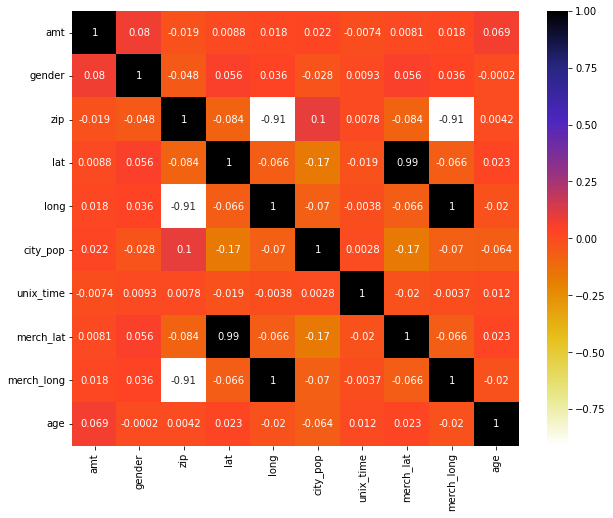

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(10,8))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

3

In [ ]:
corr_features

{'long', 'merch_lat', 'merch_long'}

In [ ]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,amt,gender,zip,lat,city_pop,unix_time,age
2135073,4.841275,1.099861,0.140233,0.423377,-0.290414,-1.040756,0.737217
985983,-0.050033,-0.909206,0.522635,-0.107041,-0.293090,0.845046,-0.182572
1975298,-0.360231,-0.909206,-0.110224,0.234647,-0.061104,0.903219,0.397467
1654880,5.034264,1.099861,-1.347019,0.575254,-0.286685,0.818262,2.116900
867735,0.681024,1.099861,-1.014259,0.228354,-0.292090,0.520738,0.737217
...,...,...,...,...,...,...,...
819739,0.530134,-0.909206,-0.555109,-2.180407,-0.125811,0.447533,-0.699953
1449724,5.742879,-0.909206,0.235276,1.271459,2.199960,0.885871,0.104862
643239,-0.294862,-0.909206,-1.319912,0.923218,-0.288586,-0.017583,-1.159847
50149,-0.386306,1.099861,-1.630436,1.241513,-0.283473,-1.663617,-1.274821


#**Mutual Information Gain**

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info

array([0.58629897, 0.12747225, 0.33153188, 0.3313653 , 0.33118493,
       0.3156504 , 0.06136648, 0.0050628 , 0.00724727, 0.20785537])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

amt           0.586299
zip           0.331532
lat           0.331365
long          0.331185
city_pop      0.315650
age           0.207855
gender        0.127472
unix_time     0.061366
merch_long    0.007247
merch_lat     0.005063
dtype: float64

In [ ]:
X_train.columns

Index(['amt', 'gender', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'age'],
      dtype='object')

In [ ]:
X_test.columns

Index(['amt', 'gender', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'age'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
sel_five=SelectKBest(mutual_info_classif,k=5)
sel_five.fit(X_train,y_train)
X_train.columns[sel_five.get_support()]

Index(['amt', 'zip', 'lat', 'long', 'city_pop'], dtype='object')

In [ ]:
from sklearn.feature_selection import SelectPercentile

In [ ]:
selected_top_columns = SelectPercentile(mutual_info_classif, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_classif at 0x7fa495de05f0>)

In [ ]:
X_train.columns[selected_top_columns.get_support()]

Index(['amt', 'zip'], dtype='object')

#**MODELS**

In [ ]:
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDRegressor , Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
lr = LogisticRegression()
model_v1 = lr.fit(X_train,y_train)
lr_acc = accuracy_score(y_test, model_v1.predict(X_test))

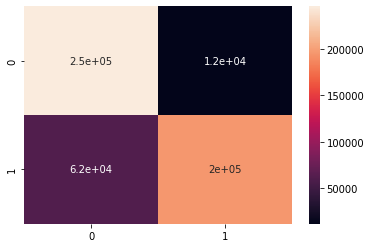

In [ ]:
ypred = model_v1.predict(X_test)
cm  = confusion_matrix(y_test,ypred)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87    257546
           1       0.94      0.76      0.84    258122

    accuracy                           0.86    515668
   macro avg       0.87      0.86      0.86    515668
weighted avg       0.87      0.86      0.86    515668



In [ ]:
#KNN model
knn = KNeighborsClassifier()
model_v2 = knn.fit(X_train,y_train)
knn_acc = accuracy_score(y_test, knn.predict(X_test))
ypred1 = model_v2.predict(X_test)

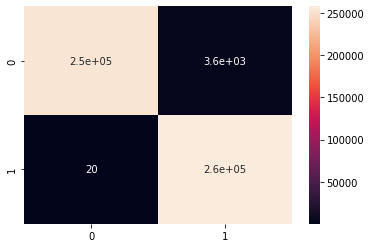

In [ ]:
cm_knn = confusion_matrix(y_test,ypred1)
sns.heatmap(cm_knn,annot=True)

In [ ]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84    257546
           1       0.96      0.66      0.78    258122

    accuracy                           0.82    515668
   macro avg       0.85      0.82      0.81    515668
weighted avg       0.85      0.82      0.81    515668



In [ ]:
nb =GaussianNB()
model_v3 = nb.fit(X_train,y_train)
nb_acc = accuracy_score(y_test, model_v3.predict(X_test))


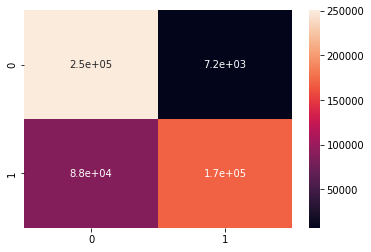

In [ ]:
ypred = model_v3.predict(X_test)
cm = confusion_matrix(y_test,ypred)
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84    257546
           1       0.96      0.66      0.78    258122

    accuracy                           0.82    515668
   macro avg       0.85      0.82      0.81    515668
weighted avg       0.85      0.82      0.81    515668



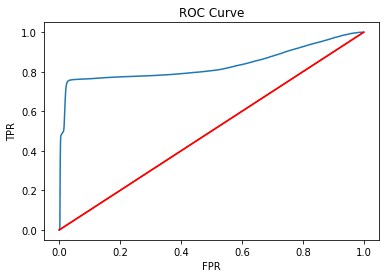

In [ ]:
#### ROC curve
## Logistic Regression Model
prob = model_v1.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,prob)
#Plotting Roc Curve
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red',linestyle = '-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

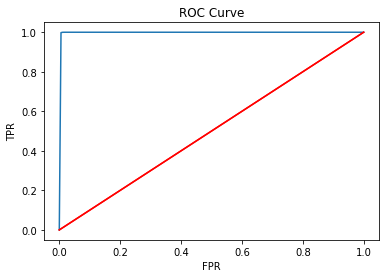

In [ ]:
## KNN Classifier Model
prob1 = model_v2.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,prob1)
#Plotting Roc Curve
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red',linestyle = '-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

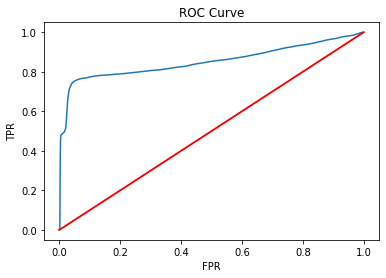

In [ ]:
## Naive Bayes Model
prob2 = model_v3.predict_proba(X_test)[:,1]

fpr,tpr,threshold = roc_curve(y_test,prob2)
#Plotting Roc Curve
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red',linestyle = '-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [ ]:
models = pd.DataFrame({'Model' : [ 'KNN', 'Logistic Regression', 'Gaussian NAive Bayes'],'Score' : [knn_acc, lr_acc, nb_acc]})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,KNN,0.992964
1,Logistic Regression,0.857187
2,Gaussian NAive Bayes,0.815156
